## Ejercicio Regresión Logistica

Objetivo del ejercicio

Construir un modelo que prediga si un estudiante será admitido en una universidad basándose en las calificaciones de dos exámenes.

Un grupo de estudiantes presentó dos exámenes de admisión, y cada estudiante fue admitido (1) o no admitido (0) en la universidad.

Pasos a seguir:

1. Generar datos sintéticos: Simular puntuaciones en dos exámenes y el resultado de admisión.
2. Dividir los datos en entrenamiento y prueba.
3. Entrenar un modelo de regresión logística usando LogisticRegression de sklearn.
4. Evaluar el modelo con una matriz de confusión y métricas de clasificación.
5. Visualizar la frontera de decisión.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [3]:
# Generar datos sintéticos (calificaciones en dos exámenes y admisión)
np.random.seed(42)
num_muestras = 500

exam1_scores = np.random.randint(40, 100, size=(num_muestras, 1))  # Examen 1 (40-100)
exam2_scores = np.random.randint(40, 100, size=(num_muestras, 1))  # Examen 2 (40-100)


In [13]:
# Crear variable objetivo (1 = Admitido, 0 = No Admitido) basado en una combinación de notas
 # Convertir a 0s y 1s
addmited = (0.20*exam1_scores + 0.4*exam2_scores + np.random.randn(num_muestras, 1)*10) > 60
y = addmited.astype(int).flatten()
# Matriz de características
X = np.hstack((exam1_scores, exam2_scores))


## Visualizar los datos

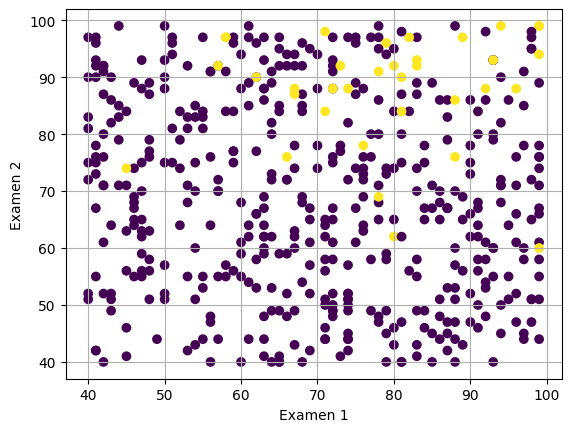

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Examen 1')
plt.ylabel('Examen 2')
plt.grid(True)
plt.show()

In [15]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Inicializar y entrenar el modelo de regresión logística
pipe = Pipeline([
    ('logisticRegression', LogisticRegression())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('logisticRegression', LogisticRegression())])

In [19]:
# Realizar predicciones
y_pred = pipe.predict(X_test)

In [20]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


### Preguntas

1. ¿Cómo afecta el número de datos al rendimiento del modelo?

2. ¿Qué pasa si cambiamos el umbral de admisión de 75 a 80?

3. Resolver el problema de desbalance de clases en la predicción de admisión.

In [21]:
# Función auxiliar para graficar la frontera de decisión:
from matplotlib.colors import ListedColormap
def plot_binary_classifcation(X, y, classifier=None, contour_alpha=0.1):
    
    def compute_predictions(X, classifier):
        return classifier.predict(X)
    
    cmap = ListedColormap(['#FF0000', '#0000FF'])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01)
    )
    
    fig, ax = plt.subplots()
    
    if classifier is not None:
        X_ = np.array([xx1.ravel(), xx2.ravel()]).T
    
        z = compute_predictions(X_, classifier)
        z = np.reshape(z, xx1.shape)
        ax.contourf(xx1, xx2, z, alpha=contour_alpha, cmap=cmap)
    
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    
    fig.set_size_inches(1.6*5, 5)

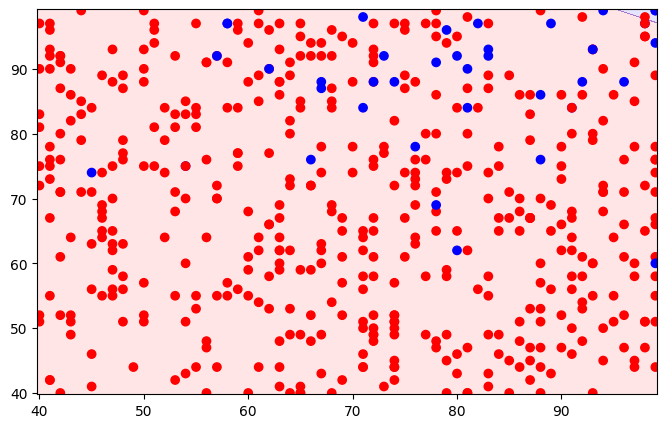

In [23]:
# Grafiquemos los datos junto con la frontera de decisión del modelo:
plot_binary_classifcation(X, y, classifier=pipe)